<a href="https://colab.research.google.com/github/shaymaridene/smart_contracts/blob/main/copie_de_frequency_analysis_of_smart_contract_risks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Advanced Frequency Analysis of Smart Contract Risks

Welcome to this interactive tutorial on conducting advanced frequency analysis using Python in Google Colab!

## Objective
The objective of this notebook is to teach you how to handle larger datasets and create dynamic visualizations to analyze the frequency of risk tags associated with smart contracts. This will involve loading data, performing data manipulation, and visualizing the results using Python libraries such as pandas, matplotlib, and seaborn.

## Before You Start
This notebook assumes you have some familiarity with basic programming concepts and a basic understanding of Python. If you are completely new to Python, I recommend reviewing Python basics before proceeding.

Let's get started by setting up our environment and loading the data!


### Step 1: Import libraries

In [ ]:
# Import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Display plots inline
%matplotlib inline



### Step 2: Download the dataset

Please note that the dataset that will be downloaded below is a dummy dataset that has been designed for the tutorial. You need to use the actualy dataset provided to you for the analysis.

In [ ]:
!gdown 1NYR65tYzMe4Rwc0kFyTEj2nerJJFRf6n

Downloading...
From: https://drive.google.com/uc?id=1NYR65tYzMe4Rwc0kFyTEj2nerJJFRf6n
To: /content/webacy_risk_dataset.xlsx
100% 28.2k/28.2k [00:00<00:00, 59.7MB/s]


In [ ]:
print("Setup complete. Imported pandas, seaborn, and matplotlib. Downloaded Webacy dummy dataset.")

Setup complete. Imported pandas, seaborn, and matplotlib. Downloaded Webacy dummy dataset.


### Step 3: Load the Data Section

Now even though we have downloaded the dataset, we still need to load it into our Python environment. For this we will utilize the Pandas library.

In [ ]:
# Loading the dataset

df = pd.read_excel('webacy_risk_dataset.xlsx')

# Display the first five rows of the dataframe
df.head()

,Blog Post Link,Smart Contract Address,Audit Website,Source link 1,Source link 2,Source link 3,Chain,Is_closed_source,hidden_owner,anti_whale_modifiable,...,centralized_risk_high,centralized_risk_low,event_setter,external_dependencies,immutable_states,reentrancy_without_eth_transfer,incorrect_inheritance_order,shadowing_local,events_maths,Summary/rationale of risk tags marked true
0,https://exampleblockchain.com/post0,0xcf503b37935247688ca1677e8159d8943035eff0,https://auditplatform.com/contract0,https://sourceinfo.com/detail159,https://sourceinfo.com/detail293,https://sourceinfo.com/detail351,Polygon,False,False,False,...,True,True,False,True,False,False,False,False,True,"Includes both buy and sell taxes, indicating t..."
1,https://exampleblockchain.com/post1,0x23813d33e70199f0fa473eb27c2004556841f49a,https://auditplatform.com/contract1,https://sourceinfo.com/detail143,https://sourceinfo.com/detail203,https://sourceinfo.com/detail377,Binance Smart Chain,False,True,False,...,False,True,True,False,True,False,False,True,True,"Includes both buy and sell taxes, indicating t..."
2,https://exampleblockchain.com/post2,0xaf811799367be2b0e35c9a4b464ff43c448ef43a,https://auditplatform.com/contract2,https://sourceinfo.com/detail179,https://sourceinfo.com/detail203,https://sourceinfo.com/detail382,Ethereum,False,False,True,...,False,False,True,False,False,True,False,False,False,Marked as honeypot due to suspicious transacti...
3,https://exampleblockchain.com/post3,0x7fd55015930f5e012420d32ad0759f0a2baf7b29,https://auditplatform.com/contract3,https://sourceinfo.com/detail159,https://sourceinfo.com/detail298,https://sourceinfo.com/detail317,Polygon,False,True,True,...,False,False,True,False,True,True,True,True,True,"Includes both buy and sell taxes, indicating t..."
4,https://exampleblockchain.com/post4,0x2e3eb32e3412be9a14a6b8b23006063ea38c8de8,https://auditplatform.com/contract4,https://sourceinfo.com/detail121,https://sourceinfo.com/detail236,https://sourceinfo.com/detail303,Ethereum,False,False,False,...,True,False,False,False,False,False,True,False,False,NaN


In [ ]:
# We can then visualize other aspects of the data.
# For example, check for data types and null values

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 40 columns):
 #   Column                                      Non-Null Count  Dtype 
---  ------                                      --------------  ----- 
 0   Blog Post Link                              100 non-null    object
 1   Smart Contract Address                      100 non-null    object
 2   Audit Website                               100 non-null    object
 3   Source link 1                               100 non-null    object
 4   Source link 2                               100 non-null    object
 5   Source link 3                               100 non-null    object
 6   Chain                                       100 non-null    object
 7   Is_closed_source                            100 non-null    bool  
 8   hidden_owner                                100 non-null    bool  
 9   anti_whale_modifiable                       100 non-null    bool  
 10  Is_anti_whale              

### Frequency Analysis

In [ ]:
# Let's now look at the value counts of an individual risk tag: is_airdrop_scam

df['is_airdrop_scam'].value_counts()

is_airdrop_scam
True     56
False    44
Name: count, dtype: int64

Okay so we see that over 50% of the dataset has True for the column `is_airdrop_scam`. Note that this is a dummy dataset and in real world you won't have that many scams, atleast we can hope that we don't that many scams.

Now, let's define all the risk columns in our dataset so that we can then run the analysis on the same.

In [ ]:
risk_columns = ['Is_closed_source', 'hidden_owner', 'anti_whale_modifiable',
       'Is_anti_whale', 'Is_honeypot', 'buy_tax', 'sell_tax',
       'slippage_modifiable', 'Is_blacklisted', 'can_take_back_ownership',
       'owner_change_balance', 'is_airdrop_scam', 'selfdestruct', 'trust_list',
       'is_whitelisted', 'is_fake_token', 'illegal_unicode', 'exploitation',
       'bad_contract', 'reusing_state_variable', 'encode_packed_collision',
       'encode_packed_parameters', 'centralized_risk_medium',
       'centralized_risk_high', 'centralized_risk_low', 'event_setter',
       'external_dependencies', 'immutable_states',
       'reentrancy_without_eth_transfer', 'incorrect_inheritance_order',
       'shadowing_local', 'events_maths']

Now that we know all the risk columns let's do a full frequency analysis on these columns.

In [ ]:
# Calculating the frequency of 'True' in each risk tag column
frequencies = df[risk_columns].apply(lambda x: x.value_counts()).loc[True]
frequencies = frequencies.fillna(0)  # Replace NaN with 0 for any column that may not have True values
frequencies

Is_closed_source                   13
hidden_owner                       34
anti_whale_modifiable              42
Is_anti_whale                      42
Is_honeypot                         8
buy_tax                            68
sell_tax                           56
slippage_modifiable                49
Is_blacklisted                     51
can_take_back_ownership            52
owner_change_balance               56
is_airdrop_scam                    56
selfdestruct                       57
trust_list                         44
is_whitelisted                     58
is_fake_token                      54
illegal_unicode                    47
exploitation                        7
bad_contract                       50
reusing_state_variable             47
encode_packed_collision            48
encode_packed_parameters           52
centralized_risk_medium            54
centralized_risk_high              46
centralized_risk_low               50
event_setter                       48
external_dep

Now that we have the frequencies, we can also visualize these using a barchart

<ipython-input-14-4db283aabe4f>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=frequencies.index, y=frequencies.values, palette='viridis')


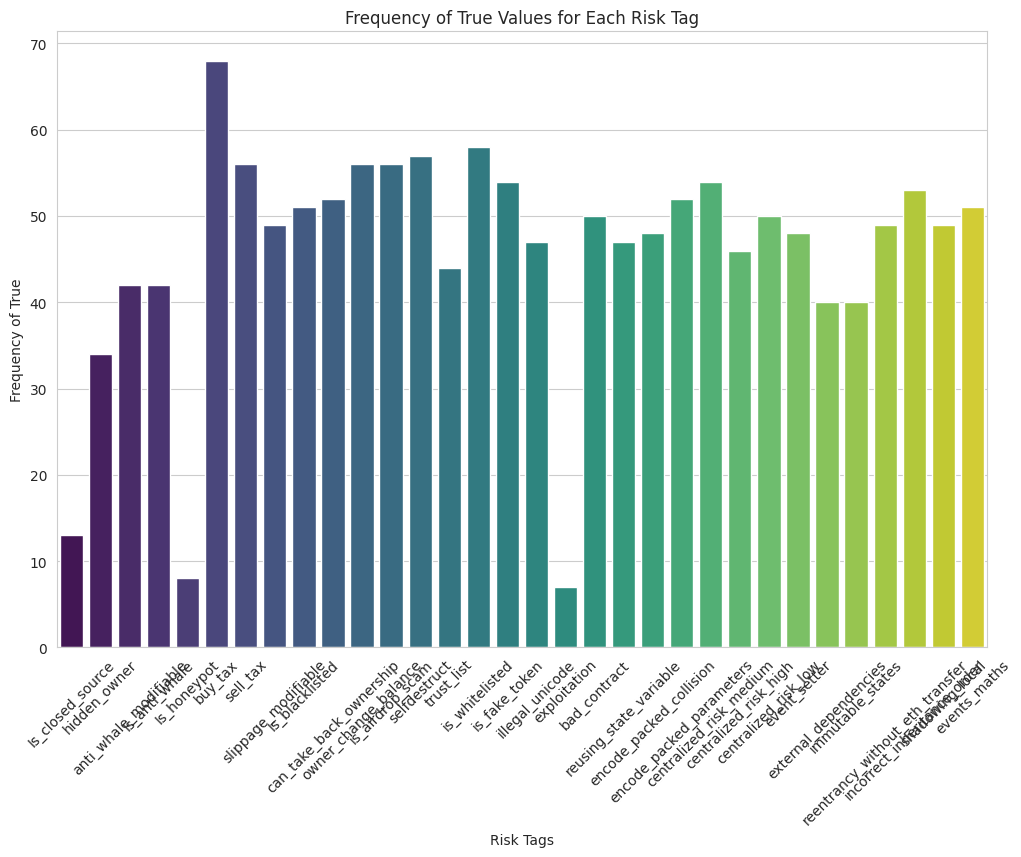

In [ ]:
# Visualizing the frequencies using a bar chart
sns.set_style("whitegrid")
plt.figure(figsize=(12, 8))
sns.barplot(x=frequencies.index, y=frequencies.values, palette='viridis')
plt.title('Frequency of True Values for Each Risk Tag')
plt.xlabel('Risk Tags')
plt.ylabel('Frequency of True')
plt.xticks(rotation=45)
plt.show()


**Again note that this is a dummy dataset. Your frequencies might be significantly lower than this with the real dataset.**

# Conclusion
Great job! You have successfully completed a frequency analysis of risk tags in smart contracts using Python. You've learned how to load data, perform calculations, and visualize the results using some of the most powerful libraries in Python.

## Next Steps
- Try modifying the charts or calculations to explore other aspects of the data.
- Consider analyzing the frequency of 'False' values or other specific conditions.
- Use this notebook as a template for analyzing other datasets.

Remember, the skills you've learned here are applicable to a wide range of data analysis tasks. Keep practicing and exploring!

Thank you for following along, and happy coding!


## Tips for Further Learning
- Explore the [pandas documentation](https://pandas.pydata.org/pandas-docs/stable/) for more advanced data manipulation techniques.
- Dive deeper into [matplotlib](https://matplotlib.org/stable/contents.html) and [seaborn](https://seaborn.pydata.org/) to discover more visualization styles and options.
- Participate in online forums and communities to enhance your learning and connect with other learners.
